# Clase 4: Modelos de clasificación

En esta clase se cubrirán los diferentes modelos de clasificación más famosos, en particular:
- Regresión Logística
- K-vecinos más cercanos
- SVM
- Árboles de clasificación
- Random Forest (Bosques Aleatorios)
- Boosting de árboles

Además, se estudiarán las métricas que de evaluación:
- Exactitud (accuracy)
- Área bajo la curva ROC (AUC ROC)
- Precisión
- Sensibilidad (recall)
- Puntaje F1

Todo lo anteriormente mencionado se estudiará a partir del paquete `scikit-learn` (sklearn)

# PARTE 1: TEORÍA



## Logit
<img src='img/LogitvsLin.png'>

#### Hiperparámetros
- $\lambda$: Parámetro de regularización
- Penalidad: L1 ó L2

## Supported Vector Machine
<img src="img/svm.png" width=600 height=600>

#### Hiperparámetros

- C: márgenes.
- Gamma: parámatro de regularización acorde al kernel.
- Kernel: Lineal, polinomial, RBF, Sigmoid.

<img src="img/svm_kernel.png" width=600 height=600>

## Árboles
<img src="img/tree.png" width=600 height=600>

#### Hiperparámetros

- Profundidad.
- Mínimo de observaciones para separar.
- Mínimo de observaciones en las hojas.

<img src="img/tree_result.png" width=600 height=600>

## Random Forest
<img src="img/RandomForest.png" width=600 height=600>

#### Hiperparámetros

- Número de árboles
- Máximo número de variables

## GBM
<img src="img/gbm.png" width=600 height=600>

#### Hiperparámetros

- Número de árboles
- Máximo número de variables

# PARTE 2: PRÁCTICA

## Bank Marketing Data Set 

Esta base contiene el resultado de una campaña de marketing por parte de un banco portugués para convencer a sus clientes de utilizar depósitos temporales (CDTs, Fiducias, etc). Para ver la descrición detallada de la base vea este [link](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

In [1]:
%matplotlib inline
from sklearn.model_selection import train_test_split # Importo la función que separa automáticamente la muestra
from sklearn.metrics import roc_auc_score # Importo la función que calcula el área bajo la curva
from sklearn.metrics import roc_curve # Importo la función para extraer los valores necesarios para graficar la curva ROC
from sklearn.metrics import accuracy_score # Importo la función para calcular la exactitud
import pandas as pd # Importamos pandas para la manipulación de datos
import matplotlib.pyplot as plt # importo el paquete y modulo específico para gráficas
import numpy as np # Operaciones matemáticas y vectoriales.

In [2]:
banco=pd.read_csv('bank-full.csv', sep=';')

## LOGIT/Ridge/Lasso

In [17]:
from sklearn.linear_model import LogisticRegression

## SVM

In [25]:
from sklearn.svm import SVC # Import la función de supported vector classifier

# Modelos de clasificación: Árboles, Random Forest y GBM

En esta clase vamos a ver los modelos de clasificación relacionados con árboles de clasificación. 

Cubriremos los siguientes temas:
- Selección de hiper-parámetros.
- Interpretación de los árboles.
- Importancia de variables.
- Tipos de ensambles: simulatáneos y secuenciales.
- Regularización de árboles.
- Evaluación de los modelos.

Estudiaremos los siguientes tres modelos:
- Árboles de clasificación
- Random Forest (Bosques aleatorios)
- Gradient Boosting Machine

## Contraceptive Method Choice Data Set
Esta base es una muestra de una encuesta sobre antoconceptivos en 1987 en Indonesia. Las muestras son mujeres casadas que podían estar o no embarazadas y no lo sabían al momento de la entrevista. __El problema de predicción será predecir si el método anticonceptivo actual es:__
0. No se usa
1. Largo plazo
2. Corto plazo

Para ver una descripción más detallada vea: https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

In [26]:
from sklearn import tree # importe de scikit-learn el módulo tree, el cual contiene árboles de clasificación.
from sklearn.ensemble import RandomForestClassifier # Importo la función para estimar RandomForest
from sklearn.ensemble import GradientBoostingClassifier # Importo la función para estimar el boosting
from sklearn.model_selection import GridSearchCV # Importo la función para hacer validación cruzada con búsqueda de parámetros

In [27]:
# Cargamos los datos
data=pd.read_csv('cmc.csv')

In [29]:
 # Estudio el tamaño de la base de datos ¿Cuántas variables hay? ¿Cuántas observaciones?

(1473, 10)

In [31]:
 # Veo las medias, que notan sobre el tipo de variables? Tiene sentido estudiar la media de TODAS las variables?

AgeWife                32.538357
EducWife                2.958588
EducHusband             3.429735
children                3.261371
IslamWife               0.850645
WorkingWife             0.749491
OccupationHusband       2.137814
StandardLivingIndex     3.133741
MediaExposure           0.073999
Contraceptive           1.919891
dtype: float64


In [32]:
 ## Obtenga las dummies

In [33]:
# Estudiemos el desbalance de las clases


1    0.427020
3    0.346911
2    0.226069
Name: Contraceptive, dtype: float64

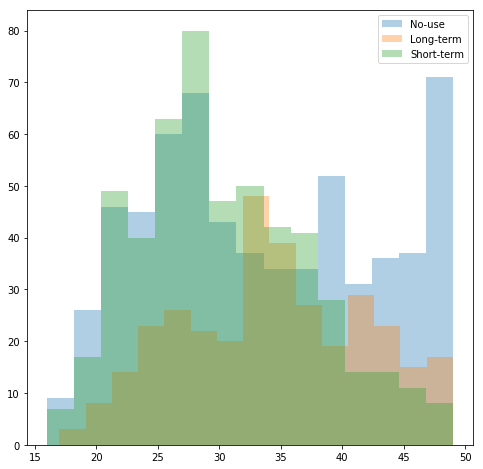

In [34]:
plt.figure(figsize=(8,8)) # Tamaño de la figura
plt.hist(data.AgeWife.loc[data.Contraceptive==1], alpha=0.35, label='No-use', bins=15) # Histograma de edad de la esposa para los Contraceptive==1
plt.hist(data.AgeWife.loc[data.Contraceptive==2], alpha=0.35, label='Long-term', bins=15) # Histograma de edad de la esposa para los Contraceptive==2
plt.hist(data.AgeWife.loc[data.Contraceptive==3], alpha=0.35, label='Short-term', bins=15) # Histograma de edad de la esposa para los Contraceptive==3
plt.legend(); # Que aparezca la leyenda

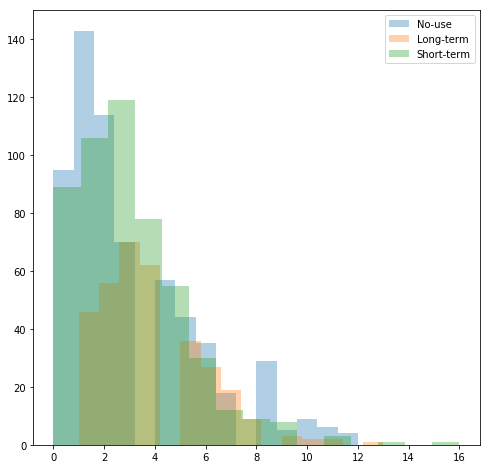

In [35]:
plt.figure(figsize=(8,8)) # Tamaño de la figura
plt.hist(data.children.loc[data.Contraceptive==1], alpha=0.35, label='No-use', bins=15) # Histograma de número de hijos para los Contraceptive==1
plt.hist(data.children.loc[data.Contraceptive==2], alpha=0.35, label='Long-term', bins=15) # Histograma de número de hijos para los Contraceptive==2
plt.hist(data.children.loc[data.Contraceptive==3], alpha=0.35, label='Short-term', bins=15) # Histograma de número de hijos para los Contraceptive==3
plt.legend(); # Que aparezca la leyenda

## Separación de entrenamiento y prueba

In [36]:
# Necesitamos separar la muestra en entrenamiento y testeo
# La función train_test_split retorna 4 outputs


In [37]:
print('El tamaño de la muestra de entrenamiento es ', train.shape)
print('El tamaño de la muestra de prueba es ', test.shape)
print('El tamaño del vector de marca de entrenamiento es ', y_train.shape)
print('El tamaño del vector de marca de prueba es ', y_test.shape)

El tamaño de la muestra de entrenamiento es  (1104, 18)
El tamaño de la muestra de prueba es  (369, 18)
El tamaño del vector de marca de entrenamiento es  (1104,)
El tamaño del vector de marca de prueba es  (369,)


## Entrenamiento del Árbol

In [38]:
 # Construyo el objeto que es el árbol de clasificación. Note la cantidad de hiper parámetros que se pueden calibrar
 # Estimo el modelo

Wall time: 0 ns


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=23, splitter='best')

## Evaluación.

In [39]:
# Que tanto aprendió dentro de la muestra?
print(roc_auc_score(y_train==1 ,arbol.predict_proba(train)[:,0]))
print(roc_auc_score(y_train==2 ,arbol.predict_proba(train)[:,1]))
print(roc_auc_score(y_train==3 ,arbol.predict_proba(train)[:,2]))
pd.crosstab(y_train,arbol.predict(train), margins=True)

0.8054379669945707
0.8077913365124839
0.771716357775987


col_0            1    2    3   All
Contraceptive                     
1              293   56  119   468
2               51  146   65   262
3               64   73  237   374
All            408  275  421  1104

In [40]:
# Que tanto aprendió el modelo, de manera generalizada?


0.7841465599617773
0.6939455525096889
0.7234929524288951


col_0            1   2    3  All
Contraceptive                   
1              105  16   40  161
2               14  31   26   71
3               30  27   80  137
All            149  74  146  369

__HAY OVERFITTING!!!__ La diferencia tan grande entre el AUC de la curva ROC entre el entrenamiento y el test nos indica esto. Para corregir esto volvemos y cambiamos los hiper-parámetros que nos permiten _podar (regularizar)_ los árboles. 

In [41]:
# Que tal si probamos diferentes max_depth y vemos su desempeño
roc_train=[]
roc_test=[]
for i in range(1,14):
    modelo=tree.DecisionTreeClassifier(max_depth=i, random_state=23)
    modelo.fit(train, y_train)
    roc_train.append(np.mean([roc_auc_score(y_train==1 ,modelo.predict_proba(train)[:,0]),roc_auc_score(y_train==2 ,modelo.predict_proba(train)[:,1]),
                              roc_auc_score(y_train==3 ,modelo.predict_proba(train)[:,2])]))
    roc_test.append(np.mean([roc_auc_score(y_test==1 ,modelo.predict_proba(test)[:,0]),roc_auc_score(y_test==2 ,modelo.predict_proba(test)[:,1]),
                              roc_auc_score(y_test==3 ,modelo.predict_proba(test)[:,2])]))

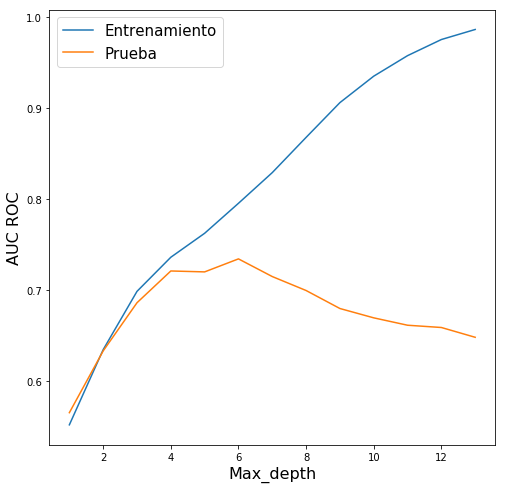

In [42]:
# Visualicemos
plt.figure(figsize=(8,8))
plt.plot(range(1,14), roc_train)
plt.plot(range(1,14), roc_test)
plt.xlabel('Max_depth', fontsize=16)
plt.ylabel('AUC ROC', fontsize=16)
plt.legend(['Entrenamiento', 'Prueba'], prop={'size':15})

## Visualización

In [43]:
#Graficamos el árbol
from sklearn.tree import export_graphviz
export_graphviz(arbol, out_file='tree1.dot', 
                feature_names = train.columns,
                rounded = True, proportion = False, 
                filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree1.png')

## Variables más importantes

In [44]:
# Creamos un dataframe con las importancias


Importancia
AgeWife                 0.372495
children                0.304587
IslamWife               0.000000
WorkingWife             0.011593
StandardLivingIndex     0.021601
MediaExposure           0.010227
OccupationHusband_1     0.058725
OccupationHusband_2     0.013826
OccupationHusband_3     0.000000
OccupationHusband_4     0.005486
EducWife_1              0.020030
EducWife_2              0.014876
EducWife_3              0.000000
EducWife_4              0.143354
EducHusband_1           0.000000
EducHusband_2           0.005652
EducHusband_3           0.017550
EducHusband_4           0.000000

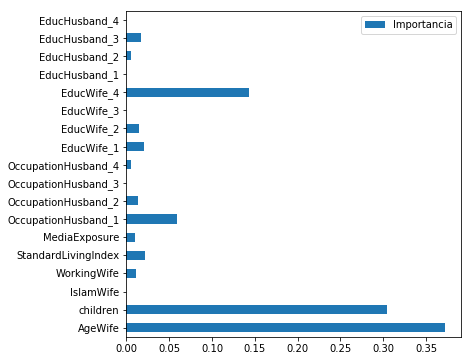

In [45]:
# Visualización de la importancia


## Random Forest

In [46]:
%%time
# Defino el RandomForest

# Estimo el modelo


Wall time: 0 ns


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)

In [47]:
# Evalúo el modelo sobre el entrenamiento
print(roc_auc_score(y_train==1 ,rf.predict_proba(train)[:,0]))
print(roc_auc_score(y_train==2 ,rf.predict_proba(train)[:,1]))
print(roc_auc_score(y_train==3 ,rf.predict_proba(train)[:,2]))
pd.crosstab(y_train,rf.predict(train), margins=True)

0.8281980728914691
0.8225508150350855
0.7921379386125558


col_0            1    2    3   All
Contraceptive                     
1              311   60   97   468
2               45  164   53   262
3               67   85  222   374
All            423  309  372  1104

In [48]:
# Evalúo sobre prueba
print(roc_auc_score(y_test==1 ,rf.predict_proba(test)[:,0]))
print(roc_auc_score(y_test==2 ,rf.predict_proba(test)[:,1]))
print(roc_auc_score(y_test==3 ,rf.predict_proba(test)[:,2]))
pd.crosstab(y_test,rf.predict(test), margins=True)

0.7777860726230292
0.7146469420550146
0.6945003775484521


col_0            1   2    3  All
Contraceptive                   
1              108  21   32  161
2               16  33   22   71
3               37  38   62  137
All            161  92  116  369

In [49]:
# Estudiamos la importancia de las variables en el RandomForest
importancia_rf=pd.DataFrame(rf.feature_importances_, index=train.columns, columns=['Importancia'])
importancia_rf

Importancia
AgeWife                 0.211962
children                0.306382
IslamWife               0.024129
WorkingWife             0.019135
StandardLivingIndex     0.020705
MediaExposure           0.054790
OccupationHusband_1     0.077252
OccupationHusband_2     0.015031
OccupationHusband_3     0.009822
OccupationHusband_4     0.010715
EducWife_1              0.029076
EducWife_2              0.013207
EducWife_3              0.009780
EducWife_4              0.093583
EducHusband_1           0.028042
EducHusband_2           0.016778
EducHusband_3           0.017749
EducHusband_4           0.041862

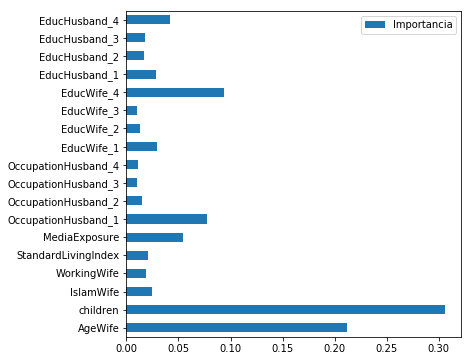

In [50]:
# Visualización de la importancia
importancia_rf.plot(kind='barh', figsize=(6,6))

In [51]:
# Que tal si probamos diferentes max_depth y vemos su desempeño
roc_train=[]
roc_test=[]
num_arboles=np.arange(5,150,5)
for i in num_arboles:
    modelo=RandomForestClassifier(n_estimators=i, max_depth=5, random_state=23)
    modelo.fit(train, y_train)
    roc_train.append(np.mean([roc_auc_score(y_train==1 ,modelo.predict_proba(train)[:,0]),roc_auc_score(y_train==2 ,modelo.predict_proba(train)[:,1]),
                              roc_auc_score(y_train==3 ,modelo.predict_proba(train)[:,2])]))
    roc_test.append(np.mean([roc_auc_score(y_test==1 ,modelo.predict_proba(test)[:,0]),roc_auc_score(y_test==2 ,modelo.predict_proba(test)[:,1]),
                              roc_auc_score(y_test==3 ,modelo.predict_proba(test)[:,2])]))

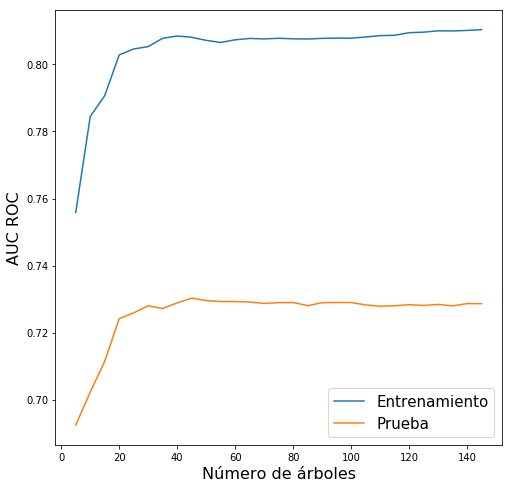

In [52]:
# Visualicemos
plt.figure(figsize=(8,8))
plt.plot(num_arboles, roc_train)
plt.plot(num_arboles, roc_test)
plt.xlabel('Número de árboles', fontsize=16)
plt.ylabel('AUC ROC', fontsize=16)
plt.legend(['Entrenamiento', 'Prueba'], prop={'size':15})

## GBM

In [53]:
%time
# Defino el GBM

# Estimo el GBM


Wall time: 0 ns


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=23, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [54]:
# Evalúo el modelo sobre el entrenamiento
print(roc_auc_score(y_train==1 ,gbm.predict_proba(train)[:,0]))
print(roc_auc_score(y_train==2 ,gbm.predict_proba(train)[:,1]))
print(roc_auc_score(y_train==3 ,gbm.predict_proba(train)[:,2]))
pd.crosstab(y_train,gbm.predict(train), margins=True)

0.874479250658496
0.882298145092564
0.8522654018020658


col_0            1    2    3   All
Contraceptive                     
1              340   36   92   468
2               38  164   60   262
3               55   58  261   374
All            433  258  413  1104

In [55]:
# Evalúo sobre prueba
print(roc_auc_score(y_test==1 ,gbm.predict_proba(test)[:,0]))
print(roc_auc_score(y_test==2 ,gbm.predict_proba(test)[:,1]))
print(roc_auc_score(y_test==3 ,gbm.predict_proba(test)[:,2]))
pd.crosstab(y_test,gbm.predict(test), margins=True)

0.7700370281892022
0.69633235655544
0.6963251950667002


col_0            1   2    3  All
Contraceptive                   
1              101  24   36  161
2               17  29   25   71
3               37  32   68  137
All            155  85  129  369

In [56]:
# Estudiamos la importancia de las variables en el GBM
importancia_gbm=pd.DataFrame(gbm.feature_importances_, index=train.columns, columns=['Importancia'])
importancia_gbm

Importancia
AgeWife                 0.315023
children                0.312776
IslamWife               0.015634
WorkingWife             0.008970
StandardLivingIndex     0.058737
MediaExposure           0.027000
OccupationHusband_1     0.041173
OccupationHusband_2     0.007734
OccupationHusband_3     0.005029
OccupationHusband_4     0.013767
EducWife_1              0.011110
EducWife_2              0.013050
EducWife_3              0.018941
EducWife_4              0.106073
EducHusband_1           0.013802
EducHusband_2           0.003878
EducHusband_3           0.022690
EducHusband_4           0.004611

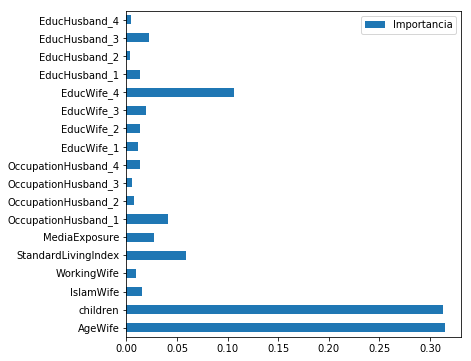

In [57]:
# Visualización de la importancia
importancia_gbm.plot(kind='barh', figsize=(6,6))

In [58]:
# Que tal si probamos diferentes max_depth y vemos su desempeño
roc_train=[]
roc_test=[]
num_arboles=np.arange(5,150,5)
for i in num_arboles:
    modelo=GradientBoostingClassifier(n_estimators=i, max_depth=5, random_state=23)
    modelo.fit(train, y_train)
    roc_train.append(np.mean([roc_auc_score(y_train==1 ,modelo.predict_proba(train)[:,0]),roc_auc_score(y_train==2 ,modelo.predict_proba(train)[:,1]),
                              roc_auc_score(y_train==3 ,modelo.predict_proba(train)[:,2])]))
    roc_test.append(np.mean([roc_auc_score(y_test==1 ,modelo.predict_proba(test)[:,0]),roc_auc_score(y_test==2 ,modelo.predict_proba(test)[:,1]),
                              roc_auc_score(y_test==3 ,modelo.predict_proba(test)[:,2])]))

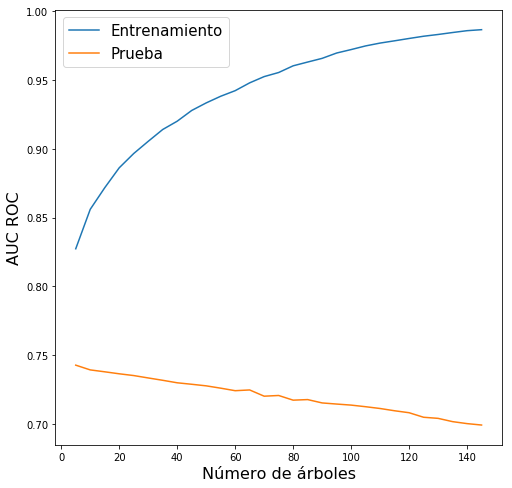

In [59]:
# Visualicemos
plt.figure(figsize=(8,8))
plt.plot(num_arboles, roc_train)
plt.plot(num_arboles, roc_test)
plt.xlabel('Número de árboles', fontsize=16)
plt.ylabel('AUC ROC', fontsize=16)
plt.legend(['Entrenamiento', 'Prueba'], prop={'size':15})

## Selección de parámetros

In [60]:
# Creo la grilla de parámetros que deseo evaluar


In [61]:
%%time
# Construyo el objeto que hace validaci'on cruzada con búsqueda de parámetros y lo estimo


C:\Users\jsmor\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 14.9 s


In [62]:
# Evalúo el modelo sobre el entrenamiento
print(roc_auc_score(y_train==1 ,best_GBM.predict_proba(train)[:,0]))
print(roc_auc_score(y_train==2 ,best_GBM.predict_proba(train)[:,1]))
print(roc_auc_score(y_train==3 ,best_GBM.predict_proba(train)[:,2]))
pd.crosstab(y_train,best_GBM.predict(train), margins=True)

0.8666596113530076
0.8693088067306123
0.8412991722218153


col_0            1    2    3   All
Contraceptive                     
1              341   39   88   468
2               39  166   57   262
3               58   66  250   374
All            438  271  395  1104

In [63]:
# Evalúo sobre prueba
print(roc_auc_score(y_test==1 ,best_GBM.predict_proba(test)[:,0]))
print(roc_auc_score(y_test==2 ,best_GBM.predict_proba(test)[:,1]))
print(roc_auc_score(y_test==3 ,best_GBM.predict_proba(test)[:,2]))
pd.crosstab(y_test,best_GBM.predict(test), margins=True)

0.7655428810320115
0.7018621797901502
0.6964982381072238


col_0            1   2    3  All
Contraceptive                   
1              106  23   32  161
2               18  30   23   71
3               40  37   60  137
All            164  90  115  369

In [64]:
best_GBM.get_params # que parámetros tiene el mejor modelo?

<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>